In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import custom libraries
import warnings
import sys
import os

# Importamos lo necesario para trabajar con consultas SQL

from pandasql import sqldf

# Definir función de consulta
pysqldf = lambda q: sqldf(q, globals())

### CARGA DE LOS DATOS

In [5]:
url = 'https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/refs/heads/main/data/raw/survey_ready.xlsx'
df = pd.read_excel(url, na_values='#N/D')

In [6]:
df

,id_empleado,rango_edad,genero,estado_civil,estudios,departamento,area,puesto,antigüedad,trabajo_varias_areas,...,notas_capacitacion,tiempo_puesto,meses_ultima_promocion,meses_jefe_actual,considerado_abandono_empresa,motivo_abandono_empresa,mejoras_para_reduccion_rotacion,factores_externos_influencia,factores_externos_opciones,comentarios_experiencia_empresa
0,InMex001,40-44,Femenino,Casado/a,Licenciatura,Operaciones,Operaciones,Contraloria y finanzas,70,No,...,NaN,70,NaN,48,Si,Me siento frustrada porque me exigen resultado...,Considero que seria importante establecer limi...,Si,"Oferta laboral en otras empresas, Salario poco...","El ambiente laboral, los constantes cambios de..."
1,InMex002,30-34,Masculino,Soltero/a,Posgrado,Operaciones,Operaciones,Gerente,109,Si,...,NaN,48,48.0,84,Si,Asumir responsabilidades sin falta de capacita...,Delimitar alcances dentro de las funsiones de ...,Si,"Oferta laboral en otras empresas, Distancia en...","Conflicto de intereses entre la direccion, fal..."
2,InMex003,30-34,Masculino,Soltero/a,Licenciatura,Masa,Tecnica,Metrologo,29,No,...,4.0,29,NaN,5,Si,Falta de reconocimiento y recompensa (no monet...,Reconocimiento con premios aunque no sean mone...,Si,"Oferta laboral en otras empresas, Distancia en...",En general no es malo el trabajo solo que la m...
3,InMex004,30-34,Masculino,Soltero/a,Licenciatura,Mediciones Especiales,Tecnica,Metrologo,34,Si,...,4.0,9,9.0,9,Si,Para obtener un salario mayor al que recibo.,"Mejores salarios, tomar en cuenta la experienc...",Si,"Oferta laboral en otras empresas, Condiciones ...",El ambiente laboral me agrada bastante y creo ...
4,InMex005,45-49,Femenino,Soltero/a,Licenciatura,Tecnica,Tecnica,Gerente,254,Si,...,NaN,72,72.0,72,No,NaN,Mejoras en los salarios,No,NaN,NaN
5,InMex006,30-34,Masculino,Soltero/a,Licenciatura,Comercial,Comercial,Asesor comercial,34,Si,...,5.0,28,28.0,22,No,NaN,"Mejores salarios, definicion de funciones y re...",No,NaN,NaN
6,InMex007,25-29,Masculino,Soltero/a,Licenciatura,Masa,Tecnica,Metrologo,8,No,...,5.0,8,NaN,8,No,NaN,Contratacion de personal competente,No,NaN,NaN
7,InMex008,45-49,Femenino,Soltero/a,Licenciatura,Calidad,Calidad,Gerente,252,Si,...,NaN,84,84.0,60,No,NaN,Mejor observacion en el proceso de contratacio...,Si,"Responsabilidades familiares, Condiciones econ...",En general estoy agusto con las actividades qu...
8,InMex009,40-44,Masculino,Casado/a,Tecnico,Masa,Tecnica,Metrologo,119,No,...,5.0,119,NaN,9,No,NaN,Mas prestaciones,No,NaN,Ninguna
9,InMex010,30-34,Masculino,Soltero/a,Licenciatura,Kaye,Tecnica,Jefe de laboratorio,36,Si,...,4.0,8,3.0,36,Si,Por crecimiento profesional y economico,"Incluir mas prestaciones como caja de ahorro, ...",Si,"Distancia entre casa y trabajo, Responsabilida...",Considero importante que se tome en cuenta la ...


## BUSINESS ANALYTICS

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_empleado                      41 non-null     object 
 1   rango_edad                       41 non-null     object 
 2   genero                           41 non-null     object 
 3   estado_civil                     41 non-null     object 
 4   estudios                         41 non-null     object 
 5   departamento                     41 non-null     object 
 6   area                             41 non-null     object 
 7   puesto                           41 non-null     object 
 8   antigüedad                       41 non-null     int64  
 9   trabajo_varias_areas             41 non-null     object 
 10  numero_areas                     41 non-null     int64  
 11  carrera                          41 non-null     object 
 12  numero_empresas         

#### ANÁLISIS DE NULOS

In [8]:
df.isna().sum().sort_values(ascending = False)

meses_ultima_promocion             21
motivo_abandono_empresa            20
factores_externos_opciones         16
comentarios_experiencia_empresa    15
notas_capacitacion                  8
estudios                            0
estado_civil                        0
genero                              0
rango_edad                          0
id_empleado                         0
departamento                        0
puesto                              0
area                                0
satisfaccion_entorno                0
satisfaccion_puesto_actual          0
implicacion_puesto                  0
antigüedad                          0
trabajo_varias_areas                0
numero_areas                        0
carrera                             0
numero_empresas                     0
horas_extras_semanales              0
horas_trabajo_mensual               0
evaluaciones_desempeno_ult_ano      0
satisfaccion_laboral_personal       0
valoracion_companeros               0
salario_mens

#### EDA VARIABLES CATEGÓRICAS

In [9]:
df.dtypes[df.dtypes == 'object'].index

Index(['id_empleado', 'rango_edad', 'genero', 'estado_civil', 'estudios',
       'departamento', 'area', 'puesto', 'trabajo_varias_areas', 'carrera',
       'valoracion_companeros', 'evaluaciones_desempeno_ult_ano',
       'salario_mensual', 'aumento_salario_ult_dos_anos',
       'viajes_mensuales_laborales', 'capacitaciones',
       'considerado_abandono_empresa', 'motivo_abandono_empresa',
       'mejoras_para_reduccion_rotacion', 'factores_externos_influencia',
       'factores_externos_opciones', 'comentarios_experiencia_empresa'],
      dtype='object')

In [10]:
# Separar los posibles valores de la columna 'factores_externos_opciones' en una lista
opciones_posibles = [
    'Oferta laboral en otras empresas',
    'Distancia entre casa y trabajo',
    'Falta de transporte adecuado',
    'Salario poco competitivo en el mercado',
    'Responsabilidades familiares',
    'Condiciones economicas generales',
    'Falta de oportunidades de crecimiento profesional',
    'Ambiente laboral',
    'Factores personales',
    'Otro'
]

df['factores_externos_opciones'] = df['factores_externos_opciones'].fillna('')

df_factores_opciones_dummies = df['factores_externos_opciones'].str.get_dummies(sep=', ')

for opcion in opciones_posibles:
     if opcion not in df_factores_opciones_dummies.columns:
        df_factores_opciones_dummies[opcion] = 0 
        
# Unir las nuevas columnas binarias al DataFrame original
df = pd.concat([df, df_factores_opciones_dummies], axis=1)

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import ceil

def graficos_eda_categoricos(cat_df):
    columnas = cat_df.columns
    n_vars = len(columnas)
    filas = ceil(n_vars / 2)

    fig = make_subplots(rows=filas, cols=2, subplot_titles=columnas)

    for i, col in enumerate(columnas):
        row = (i // 2) + 1
        col_position = (i % 2) + 1

        conteos = cat_df[col].value_counts()
        #total = conteos.sum()
        porcentajes = (conteos / 41 * 100).round(2)

        # Añadimos el gráfico de barras con etiquetas de porcentaje
        fig.add_trace(
            go.Bar(
                x=conteos.values,
                y=conteos.index,
                orientation='h',
                name=col,
                text=[f"{p}%" for p in porcentajes],
                textposition='auto',
                #marker=dict(color='steelblue')
            ),
            row=row,
            col=col_position
        )

    fig.update_layout(
        height=filas * 400,
        width=1000,
        title_text="Distribución de Variables Categóricas",
        showlegend=False
    )

    fig.update_annotations(font_size=12, font=dict(color="black"))
    fig.show()


In [12]:
df_cat_inf_personal = df[['rango_edad', 'genero', 'estado_civil', 'estudios', 'carrera']]

df_cat_trabajo = df[['departamento', 'area', 'puesto', 'trabajo_varias_areas', 
       'salario_mensual','evaluaciones_desempeno_ult_ano', 'viajes_mensuales_laborales', 'aumento_salario_ult_dos_anos', 
       'considerado_abandono_empresa', 'factores_externos_influencia']]

df_cat_rel = df[['valoracion_companeros', 'capacitaciones']]

In [13]:
graficos_eda_categoricos(df_cat_inf_personal)

In [14]:
graficos_eda_categoricos(df_cat_trabajo)

In [15]:
graficos_eda_categoricos(df_cat_rel)

#### EDA VARIABLES NUMÉRICAS

In [16]:
# Análisis de las variables numéricas

df_num = df.select_dtypes('number')
df_num.columns

Index(['antigüedad', 'numero_areas', 'numero_empresas', 'satisfaccion_entorno',
       'satisfaccion_puesto_actual', 'implicacion_puesto',
       'satisfaccion_laboral_personal', 'horas_trabajo_mensual',
       'horas_extras_semanales', 'porciento_aumento_salarial',
       'tiempo_traslado_diario', 'notas_capacitacion', 'tiempo_puesto',
       'meses_ultima_promocion', 'meses_jefe_actual', 'Ambiente laboral',
       'Condiciones economicas generales', 'Distancia entre casa y trabajo',
       'Factores personales',
       'Falta de oportunidades de crecimiento profesional',
       'Falta de transporte adecuado', 'Oferta laboral en otras empresas',
       'Otro', 'Responsabilidades familiares',
       'Salario poco competitivo en el mercado'],
      dtype='object')

In [17]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [18]:
estadisticos_cont(df_num)

,count,mean,median,std,min,25%,50%,75%,max
antigüedad,41.0,61.658537,32.00,70.214176,4.0,17.0,32.00,89.0,254.0
numero_areas,41.0,1.707317,1.00,1.006079,1.0,1.0,1.00,2.0,5.0
numero_empresas,41.0,2.878049,3.00,1.964626,0.0,2.0,3.00,3.0,8.0
satisfaccion_entorno,41.0,3.536585,4.00,1.027073,1.0,3.0,4.00,4.0,5.0
satisfaccion_puesto_actual,41.0,3.731707,4.00,1.072949,1.0,3.0,4.00,5.0,5.0
implicacion_puesto,41.0,3.975610,4.00,0.907959,2.0,3.0,4.00,5.0,5.0
satisfaccion_laboral_personal,41.0,3.658537,4.00,1.039465,1.0,3.0,4.00,4.0,5.0
horas_trabajo_mensual,41.0,44.146341,45.00,5.701145,25.0,41.0,45.00,48.0,55.0
horas_extras_semanales,41.0,1.585366,1.00,2.085373,0.0,0.0,1.00,2.0,10.0
porciento_aumento_salarial,41.0,7.069512,0.00,11.192603,0.0,0.0,0.00,19.0,30.0


Conclusiones:

* ``meses_ultima_promocion`` --> Imputar los valores faltantes con antigüedad
* ``notas_capacitacion``  --> Tiene pocos valores. Eliminarla

In [19]:
df.drop(columns = ['notas_capacitacion'], inplace = True, errors = 'ignore')
df_num.drop(columns = ['notas_capacitacion'], inplace = True, errors = 'ignore')

In [20]:
df_num['meses_ultima_promocion'].fillna(df_num['antigüedad'], inplace=True)
estadisticos_cont(df_num)


C:\Users\Miguel Oscar\AppData\Local\Temp\ipykernel_28988\3322613145.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,count,mean,median,std,min,25%,50%,75%,max
antigüedad,41.0,61.658537,32.00,70.214176,4.0,17.0,32.00,89.0,254.0
numero_areas,41.0,1.707317,1.00,1.006079,1.0,1.0,1.00,2.0,5.0
numero_empresas,41.0,2.878049,3.00,1.964626,0.0,2.0,3.00,3.0,8.0
satisfaccion_entorno,41.0,3.536585,4.00,1.027073,1.0,3.0,4.00,4.0,5.0
satisfaccion_puesto_actual,41.0,3.731707,4.00,1.072949,1.0,3.0,4.00,5.0,5.0
implicacion_puesto,41.0,3.975610,4.00,0.907959,2.0,3.0,4.00,5.0,5.0
satisfaccion_laboral_personal,41.0,3.658537,4.00,1.039465,1.0,3.0,4.00,4.0,5.0
horas_trabajo_mensual,41.0,44.146341,45.00,5.701145,25.0,41.0,45.00,48.0,55.0
horas_extras_semanales,41.0,1.585366,1.00,2.085373,0.0,0.0,1.00,2.0,10.0
porciento_aumento_salarial,41.0,7.069512,0.00,11.192603,0.0,0.0,0.00,19.0,30.0


# Análisis de los estadísticos descriptivos de las variables numéricas

A continuación se resumen los principales hallazgos tras aplicar `.describe()` a las 19 variables numéricas del cuestionario (n = 41, sin valores perdidos):

| Variable                          | Media       | Mediana  | Rango (mín–máx)     | Observaciones clave                                    |
|-----------------------------------|------------:|---------:|---------------------|--------------------------------------------------------|
| **antigüedad (meses)**            | 61,7        | 32       | 4 – 254             | Distribución muy sesgada a la derecha; algunos empleados llevan décadas en la empresa.  |
| **número de áreas**               | 1,7         | 1        | 1 – 5               | La mitad solo trabaja en un área; un pequeño grupo cubre hasta 5.                      |
| **número de empresas previas**    | 2,9         | 3        | 0 – 8               | Un 25 % nunca ha cambiado de empresa; un 75 % entre 2 y 3 cambios.                     |
| **satisfacción con el entorno**   | 3,54 (1–5)  | 4        | 1 – 5               | Nivel de satisfacción medio‑alto; relativamente poca variabilidad.                     |
| **implicación en el puesto**      | 3,73 (1–5)  | 4        | 1 – 5               | Mayor tendencia a implicarse; valores concentrados en 3–5.                             |
| **satisfacción laboral personal** | 3,98 (1–5)  | 4        | 2 – 5               | Elevada satisfacción personal; pocos casos por debajo de 3.                            |
| **horas de trabajo / semana**     | 44,1        | 45       | 25 – 55             | Jornada semanal típica entre 41 y 48 h; hay empleados a tiempo parcial (~25 h).        |
| **horas extra / semana**          | 1,6         | 1        | 0 – 10              | Mediana de 1 h extra; un 50 % no hace horas extra, pero hay picos de hasta 10 h.       |
| **% aumento salarial último año**  | 7,1 %       | 0 %      | 0 % – 30 %          | La mitad no recibió aumento; algunos sí recibieron hasta +30 %.                       |
| **tiempo de traslado / día (h)**  | 2,7         | 2,25     | 0 – 6               | Desplazamientos diarios moderados; el cuartil superior > 4 h/día.                      |
| **tiempo en el puesto (meses)**   | 32,5        | 18       | 2 – 166             | Fuerte asimetría: muchos en el puesto < 2 años, unos pocos “veteranos” llevan > 10 años. |
| **meses desde última promoción**  | 33,0        | 19       | 0 – 238             | Hay promociones recientes, pero también casos sin promoción en décadas.               |
| **meses con jefe actual**         | 27,1        | 22       | 4 – 84              | La mayoría tiene al mismo jefe desde 1–3 años; algunos llevan > 7 años.                |
| **Indicadores factor “Sí/No”**    |             |          |                     |                                                        |
| – Salario poco competitivo        | 21,95 %     | –        | 0 / 1               | 9 de cada 41 lo señalaron.                                                          |
| – Condiciones económicas          | 34,15 %     | –        | 0 / 1               | Uno de cada tres lo mencionó.                                                       |
| – … (otros factores externos)     | 4,9 %–34,1 %| –        | 0 / 1               | Tasas de incidencia bajas a medias.                                                |

---

## Conclusiones principales

1. **Experiencias muy heterogéneas en el tiempo**  
   – Antigüedades y permanencia en el puesto muestran distribuciones muy sesgadas por unos pocos “veteranos”.  
   – Revisar si conviene agrupar rangos largos para simplificar el análisis (p. ej. < 5 años, 5–10, > 10).

2. **Satisfacción y carga de trabajo**  
   – La satisfacción general es alta (medianas = 4), con poca varianza.  
   – Horas extra y traslados presentan colas largas; conviene estudiar casos extremos (> 10 h extra/semana o > 4 h de traslado diario).

3. **Movilidad y promociones**  
   – Más de la mitad no ha recibido aumento salarial en el último año ni promoción reciente (medianas = 0 en ambos).  
   – Podría analizarse la relación entre falta de aumentos/promociones y la intención de abandono.

4. **Selección de factores de abandono**  
   – Entre los factores externos, “Condiciones económicas” y “Salario poco competitivo” son los más frecuentes (≈ 20 %–35 %).  
   – El resto de factores externos obtienen incidencias bajas (< 15 %), lo que focaliza la acción en la política salarial y economía interna.

---

> **Sugerencias de seguimiento**  
> - **Recodificar** variables con colas largas o muchos ceros para robustecer futuros modelos.  
> - **Cruzar** variables críticas (promociones, aumentos) con intención de abandono para validar hipótesis.  
> - **Monitorear** casos extremos en carga de trabajo y antigüedad para detectar necesidades de retención o rotación.  


In [21]:
fila_suma = df_factores_opciones_dummies.sum(axis=0)
df_suma = pd.DataFrame(fila_suma).T
df_suma.index = ['Total']
df_factores_suma = pd.concat([df_factores_opciones_dummies, df_suma])
df_factores_suma

,Ambiente laboral,Condiciones economicas generales,Distancia entre casa y trabajo,Factores personales,Falta de oportunidades de crecimiento profesional,Falta de transporte adecuado,Oferta laboral en otras empresas,Otro,Responsabilidades familiares,Salario poco competitivo en el mercado
0,1,1,0,0,1,0,1,0,0,1
1,1,1,1,1,1,0,1,0,0,1
2,1,1,1,1,0,1,1,0,0,1
3,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,1,0


In [22]:
factores_influyentes =df_factores_suma.loc['Total'].T
if isinstance(factores_influyentes, pd.Series):
    factores_influyentes = factores_influyentes.to_frame()
factores_influyentes

,Total
Ambiente laboral,9
Condiciones economicas generales,14
Distancia entre casa y trabajo,13
Factores personales,5
Falta de oportunidades de crecimiento profesional,7
Falta de transporte adecuado,2
Oferta laboral en otras empresas,10
Otro,4
Responsabilidades familiares,8
Salario poco competitivo en el mercado,17


### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [23]:
# Cambiar nombre de la columna
df.rename(columns = {'considerado_abandono_empresa': 'abandono'}, inplace = True, errors = 'ignore')

In [24]:
df.abandono.value_counts(normalize = True) * 100

abandono
Si    51.219512
No    48.780488
Name: proportion, dtype: float64

#### 🚨🚨 La tasa de empleados que han considerado abandonar la empresa en los últimos 6 meses es del ``51.2%``.

## Análisis de los estadísticos descriptivos de las variables numéricas

1. **Experiencias muy heterogéneas en el tiempo**  
   – Antigüedades y permanencia en el puesto muestran distribuciones muy sesgadas por unos pocos “veteranos”.  
2. **Satisfacción y carga de trabajo**  
   – La satisfacción general es alta (medianas = 4), con poca varianza.  
   – Horas extra y traslados presentan colas largas; conviene estudiar casos extremos (> 10 h extra/semana o > 4 h de traslado diario).
3. **Movilidad y promociones**  
   – Más de la mitad no ha recibido aumento salarial en el último año ni promoción reciente (medianas = 0 en ambos).  
   – Podría analizarse la relación entre falta de aumentos/promociones y la intención de abandono.
4. **Selección de factores de abandono**  
   – Entre los factores externos, “Condiciones económicas” y “Salario poco competitivo” son los más frecuentes (≈ 20 %–35 %).  
   – El resto de factores externos obtienen incidencias bajas (< 15 %), lo que focaliza la acción en la política salarial y economía interna.
---
**Seguimiento**  
- **Recodificar** variables con colas largas o muchos ceros para robustecer futuros modelos.  
- **Cruzar** variables críticas (promociones, aumentos) con intención de abandono para validar hipótesis.  
- **Monitorear** casos extremos en carga de trabajo y antigüedad para detectar necesidades de retención o rotación.  
---

### Perfil tipo de empleado que ha considerado dejar la empresa.

In [78]:
import plotly.express as px
import pandas as pd # Aún es buena práctica importarlo si trabajamos con Series de pandas

def graficar_serie_con_valores(data_series, titulo=None, xlabel=None, ylabel=None, decimales=1):
    """
    Genera un gráfico de barras interactivo (Plotly) a partir de una Serie de pandas,
    mostrando los valores de la Serie (con formato porcentual) sobre las barras.

    Args:
        data_series (pd.Series): La Serie de pandas a graficar. El índice son las categorías,
                                 los valores son los números a mostrar sobre las barras.
        titulo (str, optional): El título del gráfico. Si es None, se genera uno por defecto
                                 usando el nombre de la Serie y el índice.
        xlabel (str, optional): Etiqueta para el eje X. Si es None, usa el nombre del índice de la Serie.
        ylabel (str, optional): Etiqueta para el eje Y. Si es None, usa el nombre de la Serie o 'Valor'.
        decimales (int, optional): Número de decimales a mostrar en las etiquetas de texto
                                   sobre las barras. Por defecto es 1.

    Returns:
        plotly.graph_objects.Figure: El objeto figura de Plotly. Debes usar fig.show()
                                      para mostrar el gráfico.
    """
    # Asegurarse de que la entrada sea una Serie de pandas
    if not isinstance(data_series, pd.Series):
        print("Error: La entrada debe ser una Serie de pandas.")
        return None

    # Formatear los valores de la Serie como texto para las etiquetas
    # Asumimos que los valores son porcentajes (o quieres mostrarlos como tal)
    # Crear el string de formato dinámicamente según el número de decimales
    formato_texto = f'{{:.{decimales}f}}%'
    etiquetas_texto = [formato_texto.format(valor) for valor in data_series.values]

    # Definir etiquetas y título por defecto si no se proporcionan
    if titulo is None:
        # Usar el nombre de la Serie y el nombre del índice si están disponibles
        serie_name = data_series.name if data_series.name is not None else "Valor"
        index_name = data_series.index.name if data_series.index.name is not None else "Categoría"
        titulo = f'{serie_name} por {index_name}'

    if xlabel is None:
        xlabel = data_series.index.name if data_series.index.name is not None else "Categoría"

    if ylabel is None:
        # Si la Serie tiene nombre, usarlo y añadir %, sino usar un nombre genérico
        ylabel = f'{data_series.name} (%)' if data_series.name is not None else "Valor (%)"


    # Crear el gráfico de barras con Plotly Express
    fig = px.bar(
        x=data_series.index,   # Eje X: el índice de la Serie (las categorías, ej: rangos de edad)
        y=data_series.values,  # Eje Y: los valores de la Serie (los porcentajes calculados)
        height=800,
        width=1000,
        text=etiquetas_texto,  # Añade las etiquetas de texto a las barras (los valores de la Serie formateados)
        labels={'x': xlabel, 'y': ylabel}, # Etiquetas para los ejes
        title=titulo
    )

    # Ajustar la posición del texto (opcional pero recomendado)
    fig.update_traces(textposition='outside') # 'outside' o 'inside'

    # Retornar el objeto figura de Plotly
    return fig


In [26]:
# Cambiar nombre de la columna
df.rename(columns = {'considerado_abandono_empresa': 'abandono'}, inplace = True, errors = 'ignore')
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Si':1})

In [27]:
# Analisis por edad
temp_edad = df.groupby('rango_edad').abandono.mean().sort_values(ascending = False)*100
graficar_serie_con_valores(temp_edad)

In [28]:
# Analisis por genero
temp_gen = df.groupby('genero').abandono.mean().sort_values(ascending = False) * 100
graficar_serie_con_valores(temp_gen)

In [29]:
# Analisis por estado_civil
temp_est_civ = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
graficar_serie_con_valores(temp_est_civ)

In [30]:
# Analisis por estudios
temp_estudios = df.groupby('estudios').abandono.mean().sort_values(ascending = False) * 100
graficar_serie_con_valores(temp_estudios)

In [31]:
# Analisis por departamento
temp_dep = df.groupby('departamento').abandono.mean().sort_values(ascending = False) * 100
graficar_serie_con_valores(temp_dep)

In [32]:
#  Análisis por área
temp_area = df.groupby('area').abandono.mean().sort_values(ascending = False)*100
graficar_serie_con_valores(temp_area)

In [33]:
# Análisis por puesto
temp_vareas = df.groupby('trabajo_varias_areas').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_vareas)

In [34]:
# Análisis por carrera
temp_carrera = df.groupby('carrera').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_carrera)

In [35]:
temp_val_comp = df.groupby('valoracion_companeros').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_val_comp)


In [36]:
# Análisis  por evaluación de desempeño
temp_desemp = df.groupby('evaluaciones_desempeno_ult_ano').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_desemp)

In [37]:
# Evaluación por salario
temp_salario = df.groupby('salario_mensual').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_salario)

In [38]:
# Análisis por aumento salarial
temp_aum_sal = df.groupby('aumento_salario_ult_dos_anos').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_aum_sal)

In [39]:
# Análisis por viajes
temp_viajes = df.groupby('viajes_mensuales_laborales').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_viajes)

In [40]:
# Análisis por capacitaciones
temp_capac = df.groupby('capacitaciones').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_capac)

In [41]:
# Análisis factores_externos_influencia
temp_inf = df.groupby('factores_externos_influencia').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_inf)

In [42]:
if 'index' not in factores_influyentes.columns:
    factores_influyentes.reset_index(inplace=True)
factores_influyentes.rename(columns={'index': 'Factores externos de influencia'}, inplace=True, errors='ignore')
factores_influyentes.sort_values(by = 'Total', ascending = False, inplace = True)
factores_influyentes
print(factores_influyentes.columns)

Index(['Factores externos de influencia', 'Total'], dtype='object')


In [43]:
fig = px.bar(
    factores_influyentes,
    x='Factores externos de influencia',
    y='Total',
    text='Total',  # <- Aquí se indica que el texto será el valor de 'Total'
    labels={'x': 'Factores externos de influencia', 'y': 'Total'},
    title='Factores externos que influyen en la decisión de dejar la empresa',
    height=600
)

fig.update_traces(textposition='outside')  # <- Muestra el texto fuera de las barras
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')  # <- Opcional, para estética

fig.show()


# Informe Ejecutivo: Perfil del Empleado Propenso a Considerar Abandono

## Resumen Ejecutivo  
El análisis de los datos revela que el **51.2% de los empleados** ha considerado abandonar la empresa en los últimos 6 meses. A continuación, se detallan las características clave del perfil con mayor propensión a esta intención:

---

## Características Demográficas  
### **Edad**  
- **30-34 años**: 69.2%  
- **25-29 años**: 58.3%  
**Insight**: Los empleados en etapa profesional temprana (25-34 años) muestran mayor insatisfacción, posiblemente por buscar crecimiento o mejores oportunidades.

### **Género**  
- **Mujeres (F)**: 55.6%  
**Insight**: Las mujeres están ligeramente más inclinadas a considerar el abandono, aunque la diferencia no es significativa.

### **Estado Civil**  
- **Unión libre**: 66.7%  
**Insight**: La flexibilidad laboral o la falta de beneficios asociados a estabilidad familiar podrían influir.

---

## Formación y Rol Laboral  
### **Estudios**  
- **Licenciatura**: 57.6%  
**Insight**: Los empleados con formación superior pueden percibir limitaciones en su desarrollo profesional dentro de la empresa.

### **Área de Trabajo**  
- **Servicio al Cliente**: 100%  
- **Operaciones**: 71.4%  
**Insight**: Problemas críticos en **Servicio al Cliente** (ambiente, carga laboral) requieren atención inmediata.

### **Carrera Profesional**  
- **Ciencias Sociales y Administración**: 85.7%  
- **Ciencias Exactas y Naturales**: 62.5%  
**Insight**: Falta de alineación entre las expectativas profesionales y las oportunidades internas.

---

## Condiciones Laborales  
### **Salario**  
- **12k-16k**: 61.5%  
- **16k-20k**: 57.1%  
**Insight**: Incluso empleados con salarios competitivos en la empresa consideran irse, sugiriendo que factores no monetarios (ej. cultura, reconocimiento) son críticos.

### **Aumento Salarial**  
- **Sí recibió aumento**: 75%  
**Insight**: Los aumentos no mitigaron la insatisfacción, posiblemente por falta de equilibrio vida-trabajo o expectativas no cubiertas.

### **Movilidad Laboral**  
- **Trabaja en varias áreas (Sí)**: 61.1%  
**Insight**: Sobrecarga de responsabilidades o falta de especialización podrían generar estrés.

---

## Factores Culturales y Externos  
### **Valoración de Compañeros**  
- **No valoran a sus compañeros**: 100%  
**Insight**: Ambiente laboral tóxico o falta de colaboración es un **factor crítico de abandono**.

### **Factores Externos**  
- **Influyen externamente (Sí)**: 72%  
**Insight**: El mercado laboral competitivo ofrece alternativas atractivas para empleados insatisfechos.

---

## Recomendaciones Estratégicas  
1. **Priorizar áreas críticas**: Investigar y resolver problemas en **Servicio al Cliente** y **Operaciones**.  
2. **Reforzar la cultura organizacional**: Mejorar el ambiente laboral y fomentar la colaboración.  
3. **Desarrollo profesional**: Crear planes de carrera claros, especialmente para licenciados y empleados en rangos de 25-34 años.  
4. **Revisión de beneficios no salariales**: Incluir flexibilidad horaria, reconocimiento y capacitaciones relevantes.  

**Conclusión**: La retención requiere abordar tanto factores económicos como culturales, con enfoque en grupos demográficos y áreas de alto riesgo identificadas.

# Análisis de factores externos que influyen en la decisión de dejar la empresa

De los 21 empleados que han pensado en irse en los últimos seis meses, éstos son los motivos externos señalados:

| Factor                                               | Votos | % aprox. |
|------------------------------------------------------|:-----:|:--------:|
| **Salario poco competitivo en el mercado**           |  17   |   81 %   |
| **Condiciones económicas generales**                 |  14   |   67 %   |
| **Distancia entre casa y trabajo**                   |  13   |   62 %   |
| **Oferta laboral en otras empresas**                 |  10   |   48 %   |
| **Ambiente laboral**                                 |   9   |   43 %   |
| **Responsabilidades familiares**                     |   8   |   38 %   |
| **Falta de oportunidades de crecimiento profesional**|   7   |   33 %   |
| **Factores personales**                              |   5   |   24 %   |
| **Otro**                                             |   4   |   19 %   |
| **Falta de transporte adecuado**                     |   2   |   10 %   |

---

## Resumen ejecutivo

- ### Principales palancas de retención  
  1. **Revisar competitividad salarial** frente al mercado (81 % de incidencia).  
  2. **Mitigar el impacto económico**:   
  3. **Facilitar el traslado**:  
     - Flexibilidad horaria o modalidades híbridas para los puestos más flexibles.

- ### Aspectos culturales y de desarrollo  
  - Mejorar **el clima laboral** y la comunicación interna.  
  - Diseñar **planes de carrera y formación** continuos para cubrir la demanda de crecimiento (33 % mencionan falta de oportunidades).

- ### Atención a la conciliación  
  - Esquemas de **teletrabajo parcial** o jornadas adaptadas para quienes tienen responsabilidades familiares (38 %).  
  - Políticas de apoyo a situaciones personales críticas.

---

**Conclusión:**  
Para reducir la intención de abandono es clave combinar ajustes económicos (salarios y compensaciones), facilidades logísticas (transporte, flexibilidad) y programas de desarrollo y bienestar que refuercen el compromiso de los empleados.  


### ¿Cual es el impacto económico de este problema?

# Costos de la Rotación de Personal  

## 1. **Costos de Terminación**  
   - Finiquito.  
   - Liquidación (si aplica).  
   - Trámites administrativos (ej: notificaciones legales).  

## 2. **Costos de Separación**  
   - Entrevistas de salida.  
   - Gastos administrativos relacionados con la baja (ej: actualización de sistemas).  

## 3. **Costos de Reclutamiento y Selección**  
   - Publicación de vacantes en plataformas.  
   - Tiempo invertido por el personal de RH y gerentes.  
   - Proceso de entrevistas y evaluación de candidatos.  
   - Estudios socioeconómicos y verificaciones de antecedentes.  
   - Exámenes médicos y pruebas psicométricas.  

## 4. **Costos de Capacitación e Integración (Onboarding)**  
   - Tiempo dedicado a la formación del nuevo empleado.  
   - Materiales de capacitación (manuales, cursos, software).  
   - Curva de aprendizaje hasta alcanzar la productividad esperada.  

## 5. **Pérdida de Productividad**  
   - Tiempo en que el puesto permanece vacante.  
   - Menor productividad del empleado saliente en sus últimas semanas.  
   - Menor productividad del nuevo empleado durante su adaptación.  

## 6. **Impacto en la Moral del Equipo**  
   - Efecto desmotivador en el equipo tras la salida de un colega.  
   - Posible aumento del estrés por redistribución de cargas laborales.  

## 7. **Pérdida de Conocimiento Institucional**  
   - Experiencia y know-how específico que se pierde con el empleado.  
   - Relaciones clave con clientes o proveedores que pueden afectarse.  

**Nota**: Estos costos, tanto tangibles como intangibles, subrayan la importancia de implementar estrategias de retención efectivas para minimizar el impacto financiero y operativo de la rotación.  

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario
  
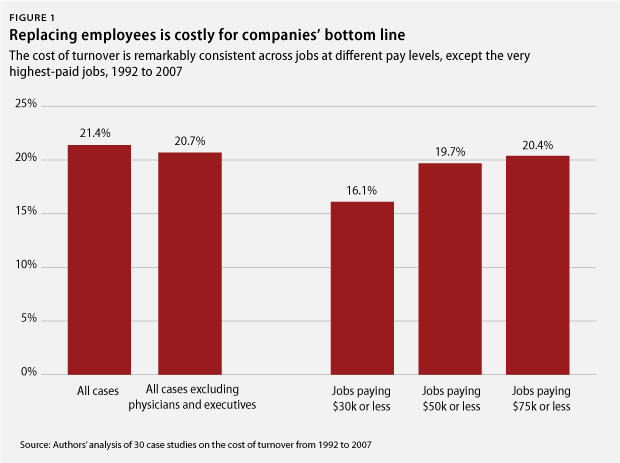

https://datos.bancomundial.org/indicador/PA.NUS.PPPC.RF?end=2023&start=2023&view=bar

Haciendo las conversión a la realidad mexicana, aplicando el factor **PPA**, obtenemos los siguientes rangos:

* El coste de la fuga de los empleados que ganan menos de 336000 MXN es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 336000-560000 MXN es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 560000-84000 es del 20,4% de su salario
  
🚨 Hay que tener en cuenta que en los casos en los que se trate de personal especializado, los costos totales pueden alcanzar hasta un **213 %** del salario medio de la empresa. <br>
https://blog-empresas.computrabajo.com/costo-de-rotacion/
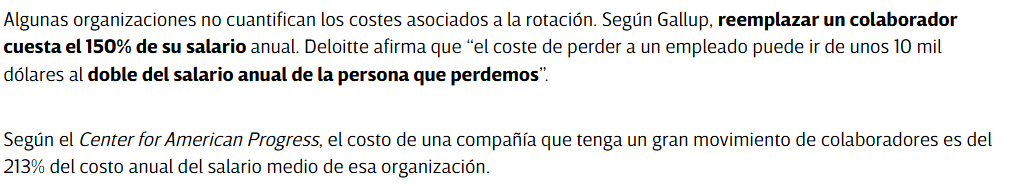
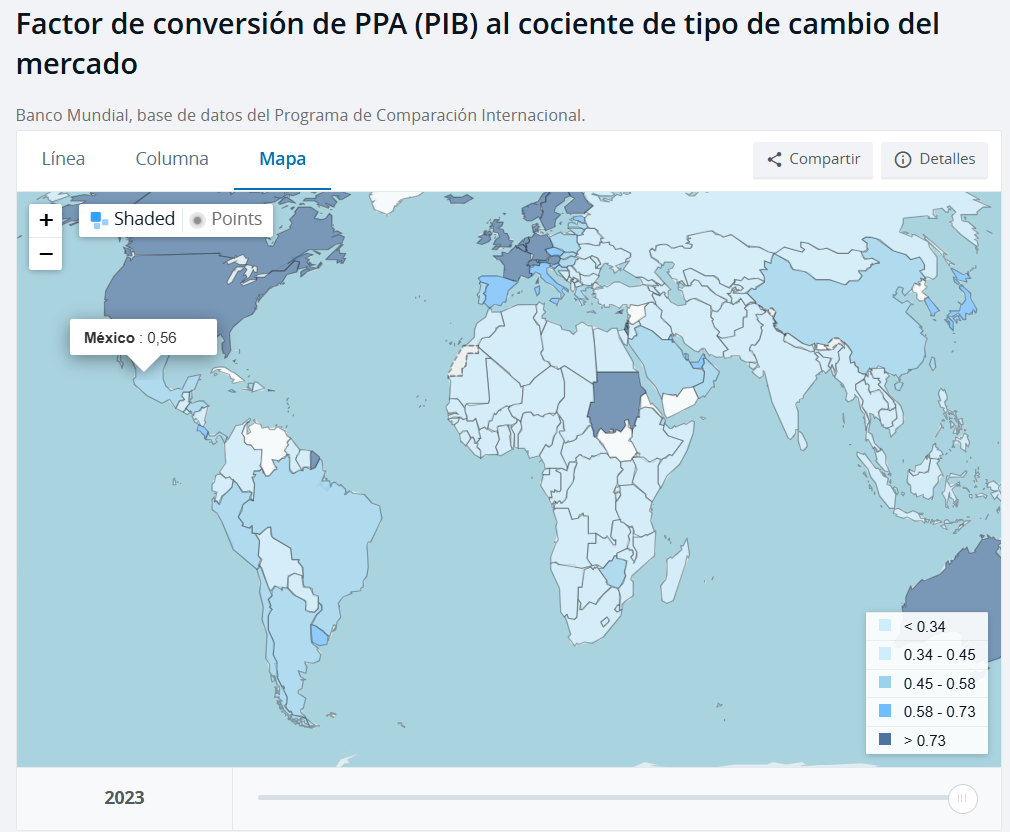

Teniendo en cuenta los factores analizados anteriormente, al ser un análisis basado en la presunción de abandono de un empleado, podemos afirmar que esto puede afectar la moral del empleado y de su entorno en el área y, por tanto, su rendimiento laboral, generando un círculo vicioso que podría desencadenar en mayores tasas de rotación, pérdida de conocimiento institucional y, en última instancia, un impacto negativo en la productividad y el clima organizacional de la empresa. Además, esta situación podría erosionar la confianza en el liderazgo, dificultar la retención de talento y afectar la reputación interna de la organización, complicando aún más la gestión de equipos a largo plazo.<br>

Para hacer un análisis más realista sobre el posible impacto que tendría el abandono de personal en la empresa tomamos como referencia los datos de abandono reales en el anterior año 2024. Para esto nos apoyaremos los datos sobre los empleados que se encuentran Odoo, estos ya han sido descargados del módulo de Empleados.


In [44]:
reg_abandono = pd.read_excel('https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/refs/heads/main/data/raw/employee_turnover.xlsx')

In [45]:
reg_abandono

,Nombre del empleado,Genero,Correo de trabajo,Puesto de trabajo,Departamento,Gerente,Fecha ingreso,Fecha de salida,Fecha de nacimiento,Razon de salida
0,Andres Reyes Garcia,Masculino,andres.reyes@inscomexico.com,Metrologo Jr,Tecnico,Gabriela Martinez Lugo,2024-04-30,2024-07-16,NaT,Despido
1,Benjamin Urbano Solis Montes de Oca,Masculino,benjamin.urbano@inscomexico.com,Jefe de Laboratorio,Tecnico,Gabriela Martinez Lugo,2005-07-01,2024-01-26,NaT,Renuncia
2,Daniel Villegas Barron,Masculino,daniel.villegas@inscomexico.com,Metrologo Jr,Tecnico,Gabriela Martinez Lugo,2019-01-01,2024-07-31,1995-09-28,Renuncia
3,Daniela Beltran Mayorga,Femenino,daniela.beltran@inscomexico.com,Metrologo,Tecnico,Gabriela Martinez Lugo,2022-03-17,2024-09-04,NaT,Renuncia
4,Dulce Irais Rivero Hernandez,Femenino,dulce@inscomexico.com,Supervisor de Laboratorio,Tecnico,Gabriela Martinez Lugo,2018-06-16,2024-08-30,NaT,Renuncia
5,Dulce Wendolyn Cruz Andrade,Femenino,dulce.cruz@inscomexico.com,Metrologo,Tecnico,Gabriela Martinez Lugo,2024-02-28,2024-05-13,NaT,Renuncia
6,Erick Moises Barajas Quiroz,Masculino,erick.barajas@inscomexico.com,Metrologo,Tecnico,Gabriela Martinez Lugo,2022-08-08,2024-06-12,NaT,Renuncia
7,Francisco Cipriano alvarez,Masculino,francisco.cipriano@inscomexico.com,NaN,NaN,NaN,2024-06-27,2024-07-08,NaT,Renuncia
8,German Crisostomo Noguez,Masculino,german.crisostomo@inscomexico.com,Auxiliar de Calidad,Calidad,Martha Elisa Rodriguez Gonzalez,2022-06-01,2024-10-15,1995-07-30,Renuncia
9,Irene Neftaly Salgado Martinez,Masculino,irene.salgado@inscomexico.com,Metrologo,Tecnico,Gabriela Martinez Lugo,2022-09-30,2024-05-03,NaT,Renuncia


In [46]:
reg_abandono = reg_abandono.rename(columns={'Nombre del empleado': 'empleado', 
                                            'Genero': 'genero', 
                                            'Correo de trabajo': 'correo', 
                                            'Puesto de trabajo': 'puesto',
                                            'Departamento': 'departamento',
                                            'Gerente': 'gerente',
                                            'Fecha ingreso': 'fecha_ingreso',
                                            'Fecha de salida': 'fecha_salida',
                                            'Fecha de nacimiento': 'fecha_nacimiento',
                                            'Razon de salida': 'razon_salida'})

In [47]:
reg_abandono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   empleado          24 non-null     object        
 1   genero            24 non-null     object        
 2   correo            24 non-null     object        
 3   puesto            23 non-null     object        
 4   departamento      23 non-null     object        
 5   gerente           23 non-null     object        
 6   fecha_ingreso     24 non-null     datetime64[ns]
 7   fecha_salida      24 non-null     datetime64[ns]
 8   fecha_nacimiento  4 non-null      datetime64[ns]
 9   razon_salida      24 non-null     object        
dtypes: datetime64[ns](3), object(7)
memory usage: 2.0+ KB


In [48]:
reg_abandono['puesto'].unique()

array(['Metrologo Jr', 'Jefe de Laboratorio', 'Metrologo ',
       'Supervisor de Laboratorio', nan, 'Auxiliar de Calidad',
       'Representante Comercial Sr.', 'Recepcion de Items', 'Becario',
       'Lider Regional de Sucursal', 'Auxiliar de Administrativo'],
      dtype=object)

In [49]:
reg_abandono.loc[reg_abandono['puesto'] == 'Metrologo Jr', 'puesto'] = 'Metrologo'
reg_abandono.loc[reg_abandono['puesto'] == 'Metrologo ', 'puesto'] = 'Metrologo'

In [50]:
def graficos_categoricos(cat_df):
    columnas = cat_df.columns
    n_vars = len(columnas)
    filas = ceil(n_vars / 2)

    fig = make_subplots(rows=filas, cols=2, subplot_titles=columnas)

    for i, col in enumerate(columnas):
        row = (i // 2) + 1
        col_position = (i % 2) + 1

        conteos = cat_df[col].value_counts()
        #total = conteos.sum()
        porcentajes = (conteos / cat_df.shape[0] * 100).round(2)

        # Añadimos el gráfico de barras con etiquetas de porcentaje
        fig.add_trace(
            go.Bar(
                x=conteos.values,
                y=conteos.index,
                orientation='h',
                name=col,
                text=[f"{p}%" for p in porcentajes],
                textposition='auto',
                #marker=dict(color='steelblue')
            ),
            row=row,
            col=col_position
        )

    fig.update_layout(
        height=filas * 400,
        width=1000,
        title_text="Distribución de Variables Categóricas",
        showlegend=False
    )

    fig.update_annotations(font_size=12, font=dict(color="black"))
    fig.show()


In [51]:
categ = reg_abandono[['puesto','genero', 'gerente', 'departamento', 'razon_salida']]

In [52]:
graficos_categoricos(categ)

# Análisis Preliminar de la Rotación de Personal en 2024

## Resumen General

El análisis de los empleados que abandonaron la empresa en 2024 muestra que la **rotación fue mayoritariamente voluntaria (83.33% renuncias)**. Los abandonos se concentran notablemente en el departamento **Técnico (70.83%)**, afectando de forma desproporcionada al rol de **Metrólogo (50.0% de las salidas)** y estando fuertemente asociados a la gerente **Gabriela Martinez Lugo (70.83% de los abandonos)**. La mayoría del personal que se fue fue de género **masculino (75.0%)**.

## Hallazgos Clave

* **Razón de Salida:** La **Renuncia** (83.33%) es la causa principal, frente al Despido (16.67%).
* **Departamento:** El departamento **Técnico** concentra la gran mayoría de las salidas (70.83%).
* **Gerente:** **Gabriela Martinez Lugo** está asociada a la mayor proporción de abandonos (70.83%).
* **Puesto:** El rol de **Metrólogo** tuvo una rotación destacada (50.0% de las salidas).
* **Género:** El 75.0% de los empleados que abandonaron fueron **Masculinos**.

## Conclusión

Los datos preliminares señalan áreas específicas (Departamento Técnico, Rol Metrólogo, equipo de G. Martinez Lugo) y una alta tasa de abandono voluntario, sugiriendo la necesidad urgente de investigar las causas subyacentes para implementar estrategias de retención focalizadas.

In [53]:
reg_abandono['tiempo_empresa'] = pd.to_datetime(reg_abandono['fecha_salida']) - pd.to_datetime(reg_abandono['fecha_ingreso'])
reg_abandono['tiempo_empresa'] = reg_abandono['tiempo_empresa'].dt.days/365
reg_abandono['tiempo_empresa']

0      0.210959
1     18.583562
2      5.583562
3      2.471233
4      6.210959
5      0.205479
6      1.846575
7      0.030137
8      2.375342
9      1.591781
10     1.076712
11     1.257534
12     3.819178
13     0.830137
14     0.432877
15     3.356164
16     0.252055
17     3.041096
18     5.375342
19     5.257534
20     3.279452
21     0.295890
22     1.383562
23     0.175342
Name: tiempo_empresa, dtype: float64

In [54]:
abandono = reg_abandono['tiempo_empresa'].describe().to_frame()
abandono

,tiempo_empresa
count,24.000000
mean,2.872603
std,3.861400
min,0.030137
25%,0.398630
50%,1.719178
75%,3.471918
max,18.583562


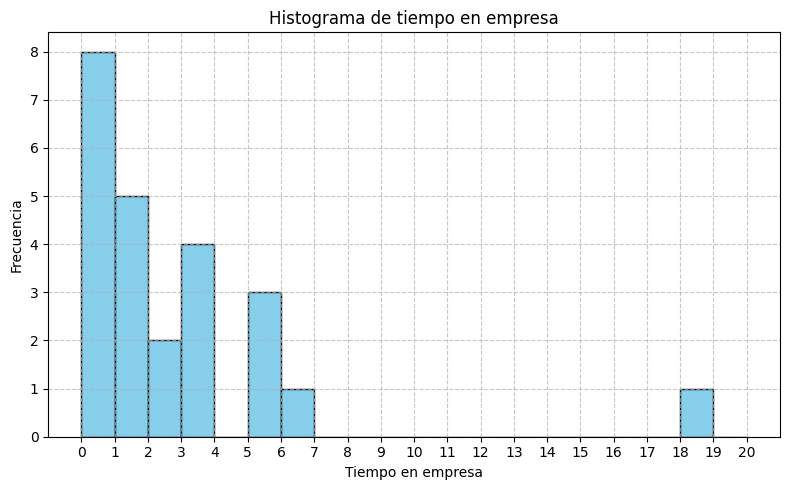

In [55]:
%matplotlib inline
# Crear histograma con 20 bins de tamaño 1
bins = np.arange(0, 21, 1)  # De 0 a 20 con paso de 1

plt.figure(figsize=(8, 5))
plt.hist(reg_abandono['tiempo_empresa'], bins=bins, edgecolor='black', color='skyblue')
plt.title('Histograma de tiempo en empresa')
plt.xlabel('Tiempo en empresa')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(bins)

plt.tight_layout()
#plt.show(block=True)


## 🧠 Insights Principales

* **Rotación Crítica en el Primer Año:** El pico más alto de abandonos ocurre durante el **primer año de antigüedad** (menos de 1 año), siendo este el grupo más numeroso de salidas registradas (8 empleados).
* **Alta Rotación en los Primeros Años (0 a 6 años):** La mayoría de los empleados que abandonaron en 2024 lo hicieron antes de cumplir 6 años, con una concentración significativa en el **primer año**, seguido por el segundo año (1-2 años: 5 empleados), y continuando en menor medida hasta los 6 años. Esto subraya **problemas fundamentales en la retención temprana y durante los primeros años** de experiencia en la empresa.
* **Pico Menor en Antigüedad Avanzada (>18 años):** Se observa una salida aislada en el rango de los 18 años (1 empleado). Este dato sugiere un abandono al final de ciclo laboral o por razones estructurales, pero numéricamente es mucho menos relevante que la rotación temprana.
* **Distribución Fuertemente Sesgada:** La distribución del tiempo de permanencia está muy lejos de ser uniforme, mostrando un **fuerte sesgo hacia la antigüedad baja**, con una caída drástica en la frecuencia de salidas a medida que aumenta el tiempo en la empresa, excepto por un caso aislado en años muy avanzados.
* **Oportunidad de Impacto Directo:** El enfoque en mejorar la experiencia durante el **primer año** y los subsiguientes (hasta los 6 años) presenta la mayor oportunidad para reducir significativamente la tasa de rotación general.

## 📌 Recomendaciones

* **Análisis de Urgencia en la Rotación < 1 Año:** Implementar un proceso de análisis cualitativo (entrevistas de salida profundas, encuestas de pulso a nuevos empleados) para identificar urgentemente los **motivos específicos** que causan el alto abandono en el primer año.
* **Optimización del Proceso de Onboarding y los Primeros Meses:** Revisar y mejorar drásticamente la experiencia de integración, capacitación y apoyo durante los primeros 12 meses de un empleado.
* **Estrategias de Retención para 1-6 Años:** Desarrollar e implementar programas de desarrollo, mentoría, feedback continuo y revisión salarial/de beneficios para empleados que superan el primer año pero aún se encuentran en sus primeros 6 años de antigüedad.
* Revisión de los casos de antigüedad muy alta (>15 años) para confirmar si son salidas esperadas (jubilación) o si hay factores de fuga en segmentos experimentados.
* Implementar un **modelo de retención segmentado por antigüedad**, priorizando las acciones en el segmento de **menos de 1 año** y de 1 a 6 años.

In [59]:
reg_abandono.columns

Index(['empleado', 'genero', 'correo', 'puesto', 'departamento', 'gerente',
       'fecha_ingreso', 'fecha_salida', 'fecha_nacimiento', 'razon_salida',
       'tiempo_empresa'],
      dtype='object')

In [69]:
dep = reg_abandono.groupby('departamento').empleado.count().sort_values(ascending=False)
dep

departamento
Tecnico        17
Operaciones     3
Comercial       2
Calidad         1
Name: empleado, dtype: int64

In [ ]:
fig = px.bar(
    dep,
    x = dep.index,
    y = dep.values,
    title='Abandonos por departamento',
    
)
fig.show()

In [73]:
dep_abandono = reg_abandono.groupby('departamento').tiempo_empresa.mean().sort_values(ascending=False)
dep_abandono

departamento
Tecnico        3.270749
Comercial      3.226027
Calidad        2.375342
Operaciones    1.494064
Name: tiempo_empresa, dtype: float64

In [74]:
fig = px.bar(
    dep_abandono,
    x = dep_abandono.index,
    y = dep_abandono.values
)
fig.show()

In [76]:
reg_abandono.to_excel('C:/Users/Miguel Oscar/Projects/data-INSCO-hub/data/processed/employee_turnover_processed.xlsx', sheet_name='abandono_real', index=False)

In [56]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

AttributeError: 'DataFrame' object has no attribute 'salario_mes'

In [ ]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
                
#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

---
<br/><br/>

### ¿Cúanto nos ha costado este problema en el último año?

In [ ]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

---
<br/><br/>

### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [ ]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

---
<br/><br/>

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [ ]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

---
<br/><br/>

### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [ ]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

Ahora vamos a estimar cuántos se nos irán este año

In [ ]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [ ]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada